<img style="float: left;;" src='Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo 3: Manipulación de Datos con la librería Pandas



<img style="float: right; margin: 0px 0px 15px 15px;" src="https://numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png" width="400px" height="400px" />

> Ya vamos agregando más librerías a nuestro arsenal. En estas clases hemos revisado aspectos muy básicos de estas librerías ([NumPy](https://www.numpy.org/) y [matplotlib](https://matplotlib.org/)). En estos enlaces pueden encontrar la documentación oficial para revisar qué más pueden hacer con estas librerías. También el `help` puede ser un buen punto de partida para conocer qué más cosas pueden realizar.

> Hoy nos dedicaremos a estudiar la librería de Python para análisis de datos: **Pandas**. Como analistas/científicos de datos en formación, esta librería será pan de cada día y les aseguro que cada día que la utilicen aprenderán cosas nuevas... entonces, más vale comenzar pronto.

Referencias:
- https://pandas.pydata.org/
- https://towardsdatascience.com/data-science-with-python-intro-to-loading-and-subsetting-data-with-pandas-9f26895ddd7f
___

# 0. Motivation

Como científicos de datos, normalmente trabajamos con grandes cantidades de datos. 

Los datos que debemos cargar pueden guardarse de muchas maneras distintas: archivos CSV, archivos de Excel, etcétera. Incluso, los datos pueden estar disponibles a través de servicios web. 

Para trabajar con datos, se hace necesario representarlos en una estructura tabular (cualquier cosa con forma de tabla con filas y columnas).

En algunos casos, los datos ya están en forma tabular y es más fácil cargarlos. En otros, debemos trabajar con datos no estructurados o que no están organizados de una manera determinada (texto plano, imágenes, audio, etcétera).

En esta clase nos vamos a concentrar en cargar datos desde archivos CSV (valores separados por coma).

## Pandas

Pandas es una librería de código abierto para el lenguaje de programación Python, desarrollada por Wes McKinney. Es una librería muy eficiente y proporciona estructuras de datos y herramientas de análisis muy fáciles de usar.

Como las librerías que hemos visto antes, Pandas viene instalado por defecto con Anaconda, así que lo único que tenemos que hacer para empezar a trabajar con ella es importarla. La comunidad utiliza normalmente la abreviación pd para referirse a pandas:

In [1]:
# Importar pandas
import pandas as pd

Los **pd.DataFrames** son los objetos por excelencia de pandas para manipular datos. Son eficientes y rápidos. Son la estructura de datos donde pandas carga los diferentes formatos de datos: cuando nuestros datos están limpios y estructurados, cada fila representa una observación, y cada columna una variable o característica. Tanto las filas como las columnas pueden tener etiquetas.

En esta clase vamos a trabajar con datos pertenecientes a ejemplos de la librería featuretools [en esta página](https://github.com/FeatureLabs/featuretools). Sin embargo para entender cómo es que se cargan estos datos, estos están disponibles en la carpeta data en formato CSV.

En esta y la siguiente clase, además de importar datos, aprenderemos a:
- seleccionar subconjuntos de datos;
- filtrar variables por categorías;
- relacionar tablas con datos complementarios;
- entre otros.

Comenzamos:

___
# 1. Importando datos

En la carpeta "data" tenemos los archivos "customers_data.csv", "sessions_data.csv", "transactions_data.csv" y "products_data.csv", cada uno de ellos conteniendo información relevante acerca de transacciones de cierta empresa.

El primer paso para comenzar a trabajar con datos es importarlos. Lo podemos hacer con la función `pd.read_csv()`:

In [2]:
# Ayuda en la función pd.read_csv()
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

Muy bien, concentrémonos en los datos de cliente (comenzaremos con estos datos pequeños para ilustrar las funcionalidades, luego iremos añadiendo tamaño):

In [3]:
# Importar customers_data.csv
customers = pd.read_csv('Data/customers_data.csv')

In [5]:
type(customers)

pandas.core.frame.DataFrame

In [8]:
customers

,Unnamed: 0,customer_id,zip_code,join_date,date_of_birth
0,0,1,60091,2011-04-17 10:48:33,1994-07-18
1,1,2,13244,2012-04-15 23:31:04,1986-08-18
2,2,3,13244,2011-08-13 15:42:34,2003-11-21
3,3,4,60091,2011-04-08 20:08:14,2006-08-15
4,4,5,60091,2010-07-17 05:27:50,1984-07-28


Bien, ya tenemos los datos cargados, sin embargo, se ve algo raro. 

¿Qué es esta columna "Unnamed: 0"? (abrir el CSV)

Para especificar que esta columna corresponde al índice, podemos usar el argumento `index_col`.

In [9]:
# Importar customers_data.csv, haciendo uso del argumento index_col
customers = pd.read_csv('Data/customers_data.csv', index_col=[0])
customers

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [10]:
# Tipo de lo que importamos
type(customers)

pandas.core.frame.DataFrame

In [12]:
customers.iloc[3, 1]

60091

Ahora nuestro DataFrame luce bien. Sin embargo, podríamos querer indizar nuestro DataFrame directamente por el id de cliente, utilizando el método `set_index()`:

In [13]:
# Usar el método set_index para indizar por el id de cliente
customers.set_index('customer_id')

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


In [14]:
customers.iloc[3, 1]

60091

In [16]:
customers['zip_code']

0    60091
1    13244
2    13244
3    60091
4    60091
Name: zip_code, dtype: int64

In [17]:
customers['join_date']

0    2011-04-17 10:48:33
1    2012-04-15 23:31:04
2    2011-08-13 15:42:34
3    2011-04-08 20:08:14
4    2010-07-17 05:27:50
Name: join_date, dtype: object

In [18]:
customers.loc[0,'zip_code']

60091

In [20]:
customers = customers.set_index('customer_id')
customers

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


In [21]:
customers

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


In [25]:
customers.iloc[3, 0]

60091

In [26]:
customers.loc[4, 'zip_code']

60091

Podemos ver que pandas no convierte **customer_id** en el índice permanente del DataFrame, a menos que se lo especifiquemos. Para especificarlo, debemos usar el argumento `inplace`

In [27]:
# Usar el método set_index para indizar por el id de cliente, usando el argumento inplace
# customers = customers.set_index("customer_id")
customers = pd.read_csv('Data/customers_data.csv', index_col=[0])
customers

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [28]:
customers.set_index('customer_id', inplace = True)

In [29]:
customers

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


___
# 2. Indización y selección de datos

Hay muchas formas de las cuales podemos seleccionar datos de DataFrames. Veremos, de acuerdo al artículo al final de este documento, la forma basada en corchetes ([]) y en los métodos `loc()` y `iloc()`.

Con los corchetes, podemos seleccionar ciertas filas, o bien, ciertas columnas. 

Para una selección de filas, podemos usar el indizado como en las listas: [start_index:end_index:step], recordando que el `end_index` no es inclusivo.

Por ejemplo, seleccionar los clientes en las primeras dos filas:

In [30]:
customers

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


In [31]:
customers[:2]

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18


Ahora, seleccionar del tercer cliente en adelante:

In [32]:
customers[2:]

,zip_code,join_date,date_of_birth
customer_id,,,
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


Finalmente, seleccionar los clientes en las filas impares:

In [35]:
customers[::2]

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
3,13244,2011-08-13 15:42:34,2003-11-21
5,60091,2010-07-17 05:27:50,1984-07-28


Similarmente, para una selección de columnas, podemos usar una lista con los nombres de las columnas requeridas. Si pasamos solo una columna como un string en lugar de una lista, el resultado será un objeto **pd.Series**:

In [36]:
customers

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


In [39]:
# Seleccionar la columna date_of_birth como Series
customers['date_of_birth']

customer_id
1    1994-07-18
2    1986-08-18
3    2003-11-21
4    2006-08-15
5    1984-07-28
Name: date_of_birth, dtype: object

In [40]:
customers['zip_code']

customer_id
1    60091
2    13244
3    13244
4    60091
5    60091
Name: zip_code, dtype: int64

In [41]:
# Tipo
type(customers['date_of_birth'])

pandas.core.series.Series

Las Series de pandas son arreglos unidimensionales que pueden ser etiquetados. En algunos casos, querremos seleccionar solo una columna pero mantener esta selección en un DataFrame. En este caso podemos pasar una lista con un solo elemento:

In [42]:
# Seleccionar la columna date_of_birth como DataFrame
customers[['zip_code']]

,zip_code
customer_id,
1,60091
2,13244
3,13244
4,60091
5,60091


In [43]:
# Tipo
type(customers[['zip_code']])

pandas.core.frame.DataFrame

Finalmente, seleccionamos dos columnas:

In [44]:
# Seleccionar las columnas date_of_birth y zip_code
customers[['zip_code', 'date_of_birth']]

,zip_code,date_of_birth
customer_id,,
1,60091,1994-07-18
2,13244,1986-08-18
3,13244,2003-11-21
4,60091,2006-08-15
5,60091,1984-07-28


Muy bien, ya vimos que los corchetes son útiles. También existen los poderosos métodos `loc` y `iloc`, que nos dan el poder de seleccionar ambos a la vez: columnas y filas.

¿En qué se diferencian?

- El método `loc` nos permite seleccionar filas y columnas de nuestros datos basados en etIquetas. Primero, se deben especificar las etiquetas de las filas, y luego las de las columnas.

- El método `iloc` nos permite hacer lo mismo pero basado en índices enteros de nuestro DataFrame (como si fueran matrices).

Como antes, si queremos seleccionar todas las filas, o columnas, simplemente escribimos `:` en el lugar adecuado.

Mejor con ejemplos:

Para un mejor entendimiento de esta parte, reetiquetaremos la numeración de clientes con una "numeración" alfabética. Es decir: 1-A, 2-B, ..., 5-E.

In [45]:
# Resetear índice en el lugar
customers_original = customers.reset_index()
customers_original

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [47]:
customers_original.index = ['A', 'B', 'C', 'D', 'E']

In [48]:
customers_original

,customer_id,zip_code,join_date,date_of_birth
A,1,60091,2011-04-17 10:48:33,1994-07-18
B,2,13244,2012-04-15 23:31:04,1986-08-18
C,3,13244,2011-08-13 15:42:34,2003-11-21
D,4,60091,2011-04-08 20:08:14,2006-08-15
E,5,60091,2010-07-17 05:27:50,1984-07-28


In [49]:
customers_original['zip_code']

A    60091
B    13244
C    13244
D    60091
E    60091
Name: zip_code, dtype: int64

In [50]:
customers_original['join_date']

A    2011-04-17 10:48:33
B    2012-04-15 23:31:04
C    2011-08-13 15:42:34
D    2011-04-08 20:08:14
E    2010-07-17 05:27:50
Name: join_date, dtype: object

Ahora sí.

Seleccionemos el primer cliente con ambos métodos:

In [55]:
# Primer cliente con loc
customers_original.loc['A']

customer_id                        1
zip_code                       60091
join_date        2011-04-17 10:48:33
date_of_birth             1994-07-18
Name: A, dtype: object

In [57]:
# Primer cliente con iloc
customers_original.iloc[0]

customer_id                        1
zip_code                       60091
join_date        2011-04-17 10:48:33
date_of_birth             1994-07-18
Name: A, dtype: object

Nos dan series, ¿y si queremos DataFrames?

In [58]:
# Primer cliente con loc en DataFrame
customers_original.loc[['A']]

,customer_id,zip_code,join_date,date_of_birth
A,1,60091,2011-04-17 10:48:33,1994-07-18


In [59]:
# Primer cliente con iloc en DataFrame
customers_original.iloc[[0]]

,customer_id,zip_code,join_date,date_of_birth
A,1,60091,2011-04-17 10:48:33,1994-07-18


Ahora, seleccionemos los clientes A y C con ambos métodos:

In [61]:
# Clientes A y C con loc
customers_original.loc[['C','A']]

,customer_id,zip_code,join_date,date_of_birth
C,3,13244,2011-08-13 15:42:34,2003-11-21
A,1,60091,2011-04-17 10:48:33,1994-07-18


In [62]:
# Clientes A y C con iloc
customers_original.iloc[[0,2]]

,customer_id,zip_code,join_date,date_of_birth
A,1,60091,2011-04-17 10:48:33,1994-07-18
C,3,13244,2011-08-13 15:42:34,2003-11-21


Ahora, de los clientes B y E, queremos su zip_code y su join_date:

In [63]:
# loc
customers_original.loc[['B','E'], ['zip_code', 'join_date']]

,zip_code,join_date
B,13244,2012-04-15 23:31:04
E,60091,2010-07-17 05:27:50


In [64]:
# iloc
customers_original.iloc[[0,2],[1,2]]

,zip_code,join_date
A,60091,2011-04-17 10:48:33
C,13244,2011-08-13 15:42:34


In [66]:
customers_original.iloc[[0,2],:3:2]

,customer_id,join_date
A,1,2011-04-17 10:48:33
C,3,2011-08-13 15:42:34


Ahora, queremos solo zip_code y join_date, pero de todos los clientes:

In [69]:
# loc
customers_original.loc[:,['zip_code', 'join_date']]


,zip_code,join_date
A,60091,2011-04-17 10:48:33
B,13244,2012-04-15 23:31:04
C,13244,2011-08-13 15:42:34
D,60091,2011-04-08 20:08:14
E,60091,2010-07-17 05:27:50


In [67]:
# iloc
customers_original.iloc[:,[1,2]]

,zip_code,join_date
A,60091,2011-04-17 10:48:33
B,13244,2012-04-15 23:31:04
C,13244,2011-08-13 15:42:34
D,60091,2011-04-08 20:08:14
E,60091,2010-07-17 05:27:50


¿Qué tal? Ya tenemos varias formas de seleccionar e indexar ciertos datos.

Esto es, sin duda, muy útil. Por otra parte, muchas veces queremos obtener cierta información (clientes, en nuestro ejemplo) que cumplan algunos requisitos. Por ejemplo:
- que sean mayores de 18 años, o
- que su antiguedad en la plataforma sea menor a seis meses, o
- que residan en cierta zona,
- entre otros.

Para ello utilizamos los operadores de comparación (==, >, <, >=, <=, !=).

In [71]:
2 == 2

True

___
# 3. Filtrado de datos

Los operadores de comparación pueden ser utilizados con Series de pandas. 

Esto resulta ser súper útil para filtrar datos con ciertas condiciones específicas (esto lo veremos enseguida). 

Por ahora, veremos que al usar operadores de comparación con Series, el resultado será Series booleanas. Es decir, cada elemento de dichas series será `True` si la condición se satisface, y `Falso` de lo contrario.

Una vez tenemos la serie boolena, podemos aplicarla para la selección de filas, obteniendo un DataFrame filtrado como resultado.

In [72]:
customers


,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
4,60091,2011-04-08 20:08:14,2006-08-15
5,60091,2010-07-17 05:27:50,1984-07-28


**Ejemplos**

¿Cuáles clientes son mayores de 18 años?

In [73]:
customers['date_of_birth']

customer_id
1    1994-07-18
2    1986-08-18
3    2003-11-21
4    2006-08-15
5    1984-07-28
Name: date_of_birth, dtype: object

In [80]:
series_birth =customers['date_of_birth']<='2006-01-01'

In [81]:
customers[series_birth]

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
5,60091,2010-07-17 05:27:50,1984-07-28


In [82]:
customers[customers['date_of_birth']<='2006-01-01']

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
5,60091,2010-07-17 05:27:50,1984-07-28


¿Cuáles clientes se registraron después del primero de Junio del 2011?

In [84]:
# Recent joins
customers[customers['join_date']>'2011-06-01']['zip_code']

customer_id
2    13244
3    13244
Name: zip_code, dtype: int64

¿Cuáles clientes viven en la zona con CP 13244?

In [91]:
type(customers.iloc[0,0])

numpy.int64

In [92]:
# Zone
customers[customers['zip_code']==13244]

,zip_code,join_date,date_of_birth
customer_id,,,
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21


Entonces ya tenemos las series booleanas de las que hablábamos. Ahora, ¿cómo podemos usar esto para obtener la información de los clientes que cumplen estas características?

In [ ]:
# Filtrar por clientes adultos


In [ ]:
# Filtrar por registros recientes


In [ ]:
# Filtrar por zona


**¡Excelente!**

Los filtrados que acabamos de hacer fueron de una sola condición. Ahora, ¿cómo hacer filtrados con múltiples condiciones?

## 3.1 Filtrado con múltiples condiciones

Cuando queremos filtrar datos con múltiples condiciones, podemos usar operadores booleanos (`and`, `or`, `not`), solo con una pequeña modificación. Usamos:

- `&` en lugar de `and`,
- `|` en lugar de `or`, y
- `~` en lugar de `not`.

**Ejemplos**

Obtener la información de los clientes adultos que vivan en la zona con código postal 13244

In [93]:
customers[customers['zip_code']==13244]

,zip_code,join_date,date_of_birth
customer_id,,,
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21


In [94]:
customers[customers['date_of_birth']<='2006-01-01']

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
5,60091,2010-07-17 05:27:50,1984-07-28


In [97]:
(customers['zip_code']==13244)

customer_id
1    False
2     True
3     True
4    False
5    False
Name: zip_code, dtype: bool

In [98]:
(customers['date_of_birth']<='2006-01-01')

customer_id
1     True
2     True
3     True
4    False
5     True
Name: date_of_birth, dtype: bool

In [96]:
(customers['zip_code']==13244) & (customers['date_of_birth']<='2006-01-01')

customer_id
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [95]:
customers[(customers['zip_code']==13244) & (customers['date_of_birth']<='2006-01-01')]

,zip_code,join_date,date_of_birth
customer_id,,,
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21


Obtener la información de los clientes que sean adultos o que se hayan registrado luego del 6 de Junio del 2011

In [101]:
(customers['date_of_birth']<='2006-01-01')

customer_id
1     True
2     True
3     True
4    False
5     True
Name: date_of_birth, dtype: bool

In [102]:
 (customers['date_of_birth']<='2006-01-01')

customer_id
1     True
2     True
3     True
4    False
5     True
Name: date_of_birth, dtype: bool

In [100]:
(customers['date_of_birth']<='2006-01-01') | (customers['date_of_birth']<='2006-01-01')

customer_id
1     True
2     True
3     True
4    False
5     True
Name: date_of_birth, dtype: bool

In [99]:
customers[(customers['date_of_birth']<='2006-01-01') | (customers['date_of_birth']<='2006-01-01')]

,zip_code,join_date,date_of_birth
customer_id,,,
1,60091,2011-04-17 10:48:33,1994-07-18
2,13244,2012-04-15 23:31:04,1986-08-18
3,13244,2011-08-13 15:42:34,2003-11-21
5,60091,2010-07-17 05:27:50,1984-07-28


Obtener la información de los clientes que **NO** se hayan registrado en 2011

In [107]:
customers[~((customers['join_date']>='2011-01-01') & (customers['join_date']<='2011-12-31'))]

,zip_code,join_date,date_of_birth
customer_id,,,
2,13244,2012-04-15 23:31:04,1986-08-18
5,60091,2010-07-17 05:27:50,1984-07-28


In [109]:
customers[(customers['join_date']<'2011-01-01') | (customers['join_date']>'2011-12-31')]

,zip_code,join_date,date_of_birth
customer_id,,,
2,13244,2012-04-15 23:31:04,1986-08-18
5,60091,2010-07-17 05:27:50,1984-07-28


In [111]:
df = pd.read_csv('Data/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


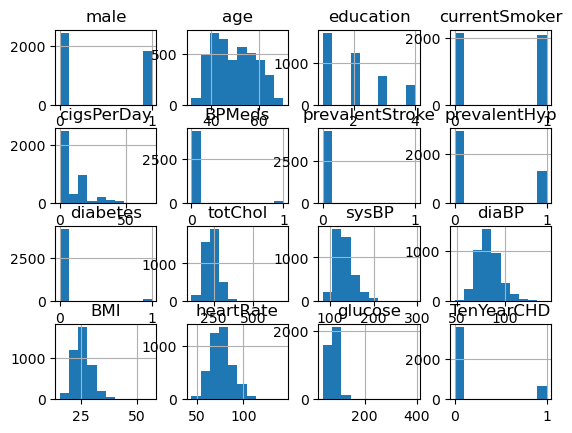

In [113]:
df.hist();

In [115]:
df['age'].values

array([39, 46, 48, ..., 52, 40, 39], dtype=int64)

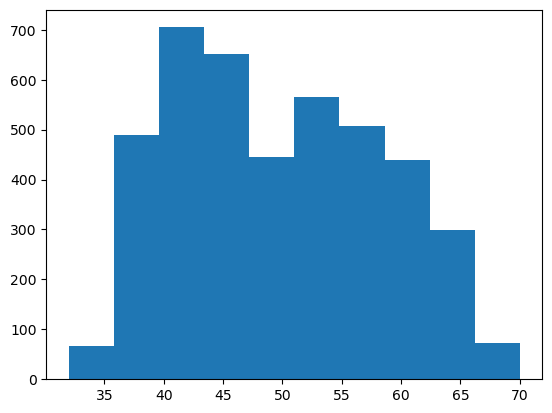

In [118]:
from matplotlib import pyplot as plt
plt.hist(df['age'].values);

In [120]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


<Axes: >

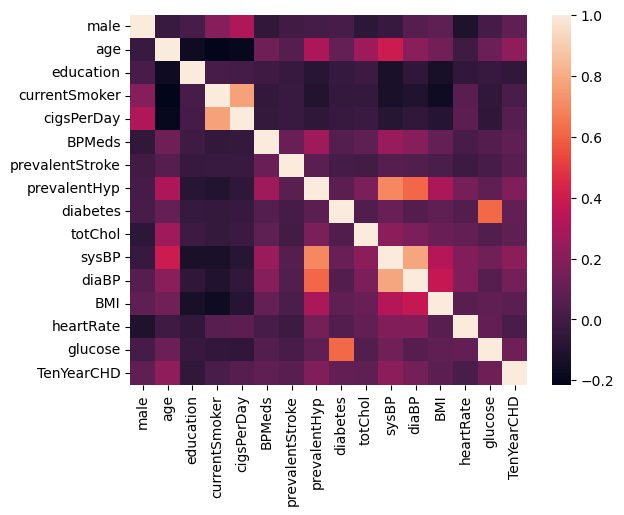

In [124]:
import seaborn as sns
sns.heatmap(df.corr())

De esta manera, podemos crear condiciones tan complejas y restrictivas como queramos para filtrar nuestros datos.

Útil, ¿no?

## Quiz 4

## [Artículo recomendado](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)

In [125]:
import numpy as np

In [138]:
a = np.arange(-0.9,1.1,0.1)

In [139]:
a

array([-9.00000000e-01, -8.00000000e-01, -7.00000000e-01, -6.00000000e-01,
       -5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
       -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,  2.00000000e-01,
        3.00000000e-01,  4.00000000e-01,  5.00000000e-01,  6.00000000e-01,
        7.00000000e-01,  8.00000000e-01,  9.00000000e-01,  1.00000000e+00])

In [140]:
len(a)

20